In [3]:
library("ggplot2")
library("dplyr")
library("readr")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
# Leyendo usuarios y calificaciones en un dataframe
califs <- read.table("./movies_data/udata.data", sep="\t", header=TRUE)
users <- read.table("./movies_data/u.user", sep="|", header=TRUE)
df1 <- left_join(users,califs, by=c("userid"="userid"), multiple="all")

# Extraemos la calificación y la ocupación
df2 <- data.frame(df1$rate, df1$occupation)

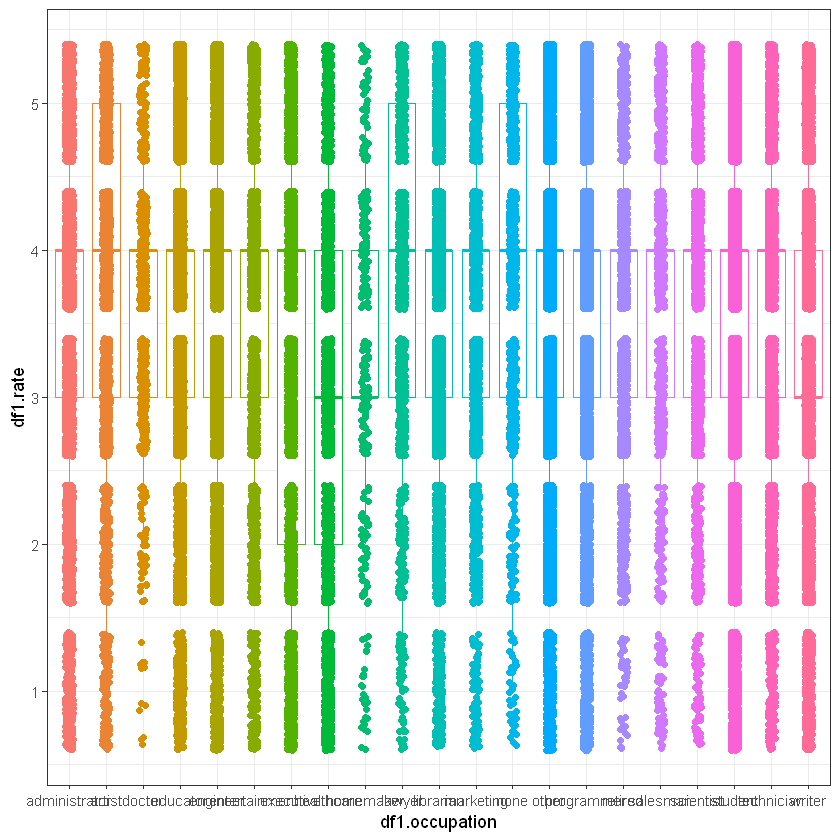

In [5]:
# Mostramos una grafica de la concentración de las calificaciones con base a la ocupación
ggplot(
    data=df2,
    aes(x=df1.occupation,y=df1.rate,color=df1.occupation) # aes() : Este método se utiliza dentro del ggplot() y se le pasan los atributos estéticos de la gráfica.
) +
geom_boxplot(outlier.shape = NA) + # geom_boxplot() : Este método se utiliza para agregar un boxplot a la gráfica mostrando la distribución de los datos. El argumento outlier. shape = NA se utiliza para que no se muestren los puntos considerados fuera de rango (outliers).
geom_jitter(width = 0.1) + # geom_jitter() : Este método se utiliza para agregar un gráfico de dispersión con cierta aleatoriedad de los datos. El argumento width=e.l se utiliza para controlar el ancho de los puntos y evitar que se superpongan.
theme_bw() + 
theme(legend.position = "null")

In [6]:
# Aplicamos el modelo de regresión lineal
modeloRL <- lm(rate ~ occupation, data=df1)
summary(modeloRL)


Call:
lm(formula = rate ~ occupation, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7791 -0.5683  0.3644  0.5589  2.1038 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.63565    0.01292 281.388  < 2e-16 ***
occupationartist         0.01773    0.02661   0.667 0.505092    
occupationdoctor         0.05324    0.04979   1.069 0.284916    
occupationeducator       0.03497    0.01730   2.022 0.043175 *  
occupationengineer      -0.09424    0.01788  -5.271 1.36e-07 ***
occupationentertainment -0.19460    0.02762  -7.045 1.86e-12 ***
occupationexecutive     -0.28654    0.02310 -12.402  < 2e-16 ***
occupationhealthcare    -0.73943    0.02474 -29.885  < 2e-16 ***
occupationhomemaker     -0.33464    0.06590  -5.078 3.82e-07 ***
occupationlawyer         0.09967    0.03309   3.012 0.002598 ** 
occupationlibrarian     -0.07487    0.02009  -3.726 0.000195 ***
occupationmarketing     -0.15001    0.02841  -5.280 1.30e-07

In [7]:
# Creamos nuestro conjunto de datos sin la columna que se espera estimar
x <- data.frame(occupation = c("student", "doctor", "artist", "educator"))
# Predicción
prediction <- predict(modeloRL, x)

In [10]:
class(prediction)
print(prediction)

[1] "numeric"

       1        2        3        4 
3.515143 3.688889 3.653380 3.670621 


`geom_smooth()` using formula = 'y ~ x'


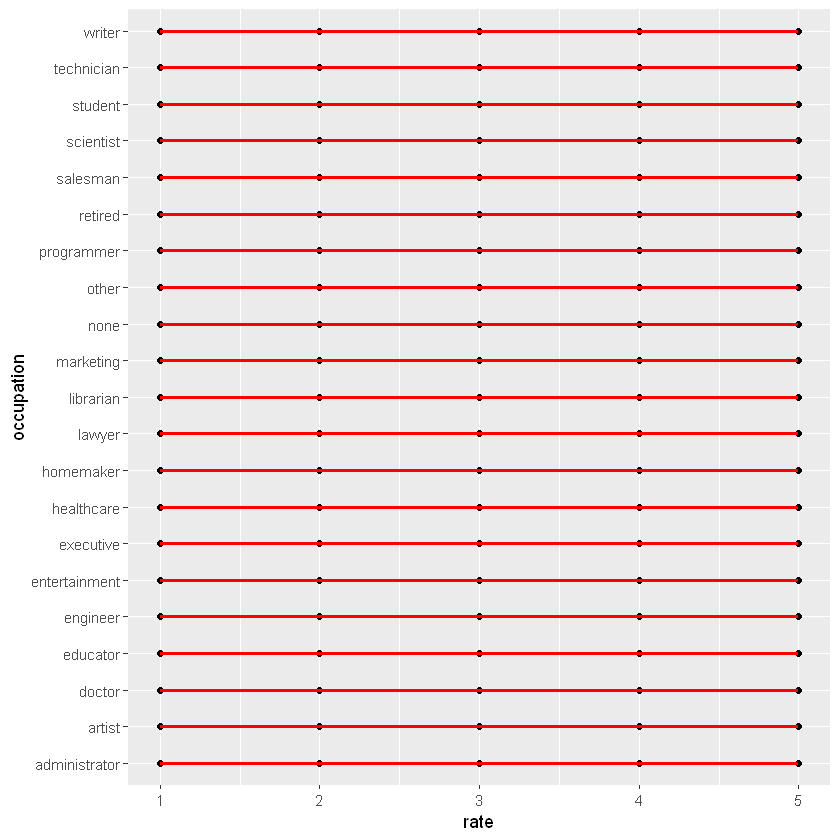

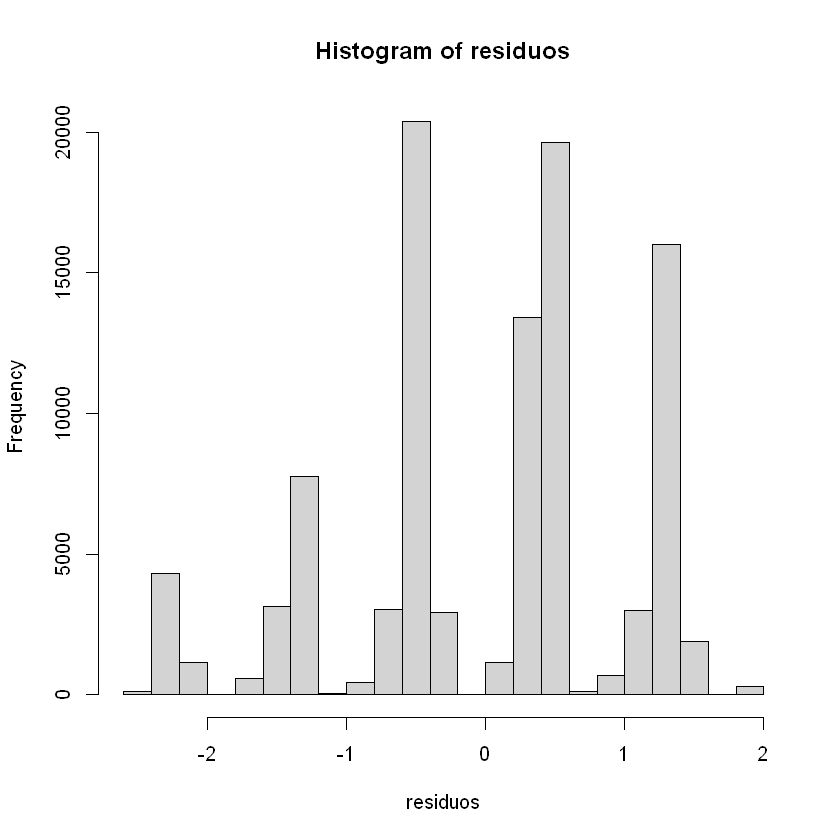

In [12]:
# Graficamos la predicción
ggplot(modeloRL, aes(rate, occupation)) + geom_point() + geom_smooth(method = "lm", color = "red")
residuos <- rstandard(modeloRL)
hist(residuos)